#1. Data Definition

다중 선형 회귀는 독립변수 x의 개수가 여러개

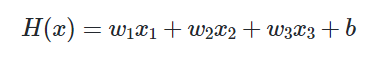

#2. 파이토치로 구현

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad = True)
w2 = torch.zeros(1, requires_grad = True)
w3 = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [ ]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr = 1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

  # cost 계산
  cost = torch.mean((hypothesis - y_train) ** 2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번 마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
        epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
    ))

Epoch    0/1000 w1: 0.718 w2: 0.612 w3: 0.680 b: 0.009 Cost: 1.078964
Epoch  100/1000 w1: 0.722 w2: 0.608 w3: 0.680 b: 0.009 Cost: 1.038180
Epoch  200/1000 w1: 0.727 w2: 0.603 w3: 0.681 b: 0.010 Cost: 0.999513
Epoch  300/1000 w1: 0.731 w2: 0.599 w3: 0.681 b: 0.010 Cost: 0.962859
Epoch  400/1000 w1: 0.735 w2: 0.595 w3: 0.681 b: 0.010 Cost: 0.928092
Epoch  500/1000 w1: 0.739 w2: 0.590 w3: 0.681 b: 0.010 Cost: 0.895123
Epoch  600/1000 w1: 0.743 w2: 0.586 w3: 0.682 b: 0.010 Cost: 0.863870
Epoch  700/1000 w1: 0.746 w2: 0.582 w3: 0.682 b: 0.010 Cost: 0.834221
Epoch  800/1000 w1: 0.750 w2: 0.579 w3: 0.682 b: 0.010 Cost: 0.806112
Epoch  900/1000 w1: 0.754 w2: 0.575 w3: 0.682 b: 0.010 Cost: 0.779432
Epoch 1000/1000 w1: 0.757 w2: 0.571 w3: 0.682 b: 0.011 Cost: 0.754143


#3. 벡터와 행렬 연산으로 바꾸기

x의 개수가 많을 때 효율을 높이기 위해 행렬 곱셈 연산(벡터의 내적) 사용

##1) 벡터의 연산으로 이해

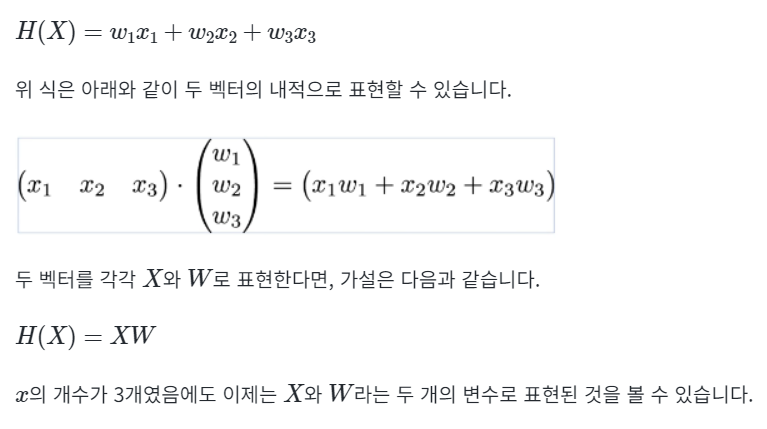

##2) 행렬 연산으로 이해

sample : 전체 훈련 데이터의 개수를 셀 수 있는 1개의 단위

feature : 각 샘플에서 y를 결정하게 하는 각각의 독립변수x

독립변수 x의 수 = 샘플의 수 x 특성의 수

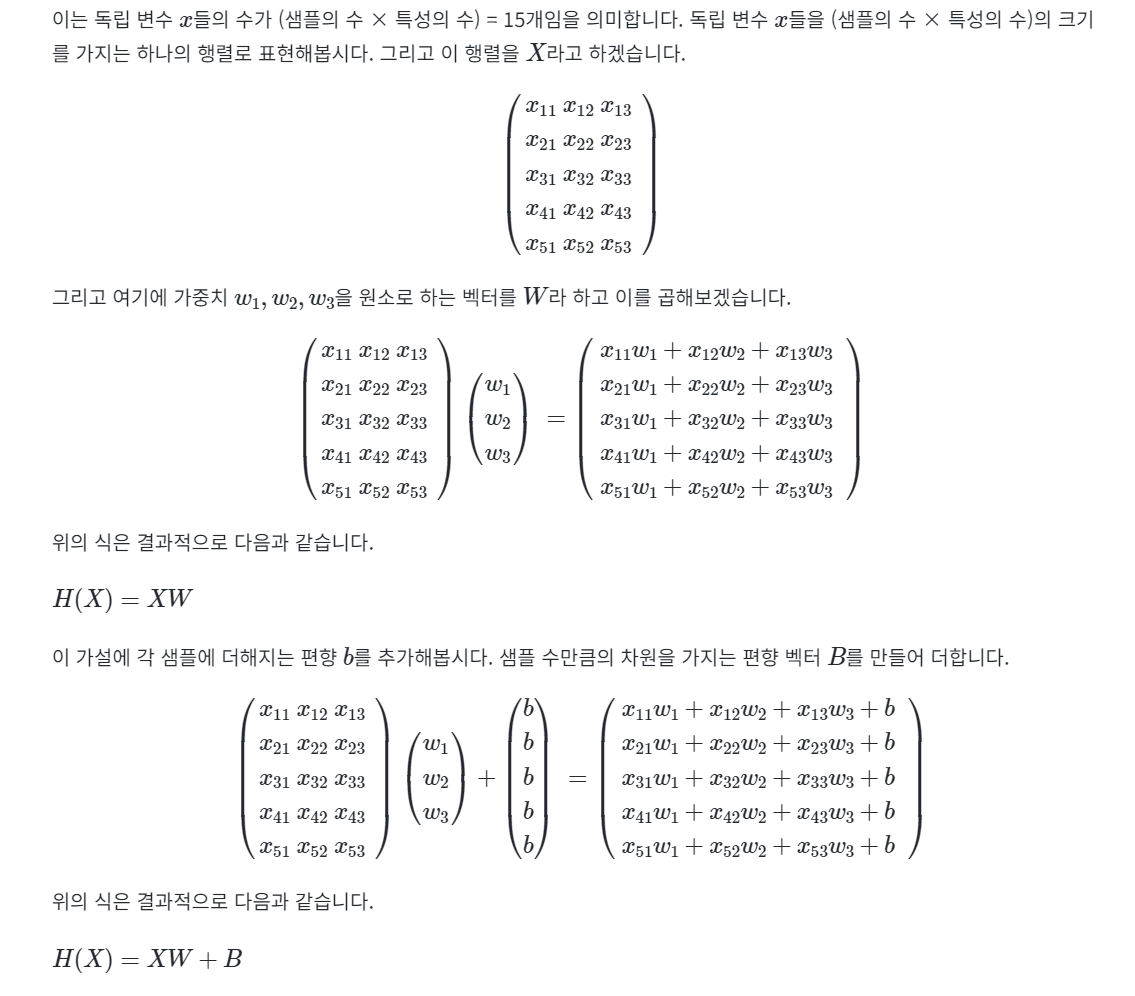

##4) 행렬 연산을 고려하여 파이토치로 구현

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 80],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [ ]:
# 가중치와 편향 선언
W = torch.zeros((3, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [ ]:
hypothesis = x_train.matmul(W)+b

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 80],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs+1):
  # H(x) 계산
  # 편향 b는 브로드캐스팅되어 각 샘플에 더해짐
  hypothesis = x_train.matmul(W) + b

  # cost 계산
  cost  = torch.mean((hypothesis - y_train) ** 2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{} hypothesis: {} cost: {:.6f}'.format(
      epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
  ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) cost: 7.071114
Epoch   10/20 hyp